In [ ]:
# Fisher's Linear Discriminant Analysis-Altman

In [1]:
#Import Core Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=4)
import seaborn as sns
sns.set() 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read file
mydata=pd.read_csv("examlogit.csv")
mydata.head()

,no,Loyalty,Brand,Product,Shopping
0,1,1,4,3,5
1,2,1,6,4,4
2,3,1,5,2,4
3,4,1,7,5,5
4,5,1,6,3,4


In [3]:
#Count How many are Bankrupt and Solvent
mydata["Loyalty"].value_counts()

1    15
0    15
Name: Loyalty, dtype: int64

In [4]:
#Define Predictor Variables
X=mydata.iloc[:,2:5]
X.shape

(30, 3)

In [5]:
X.head()

,Brand,Product,Shopping
0,4,3,5
1,6,4,4
2,5,2,4
3,7,5,5
4,6,3,4


In [6]:
#Define Group Variable Y after Numerical Coding
Y=mydata["Loyalty"]

            Brand  Product  Shopping     Status
Loyalty                                        
0        3.533333      3.8  3.066667  Not Loyal
1        5.666667      4.2  4.000000      Loyal


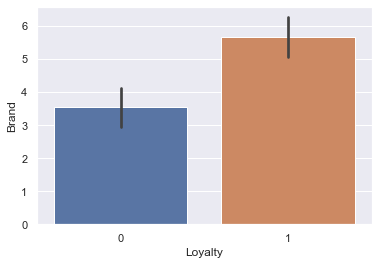

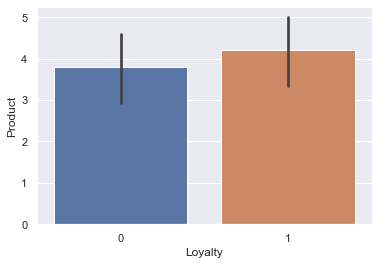

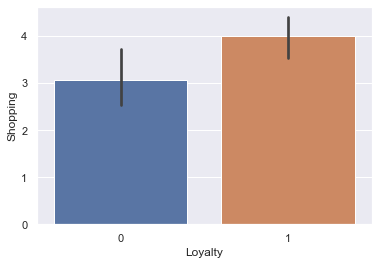

In [10]:
#Descriptive Profiling and Differentiation
Profile=pd.pivot_table(mydata,values=["Brand","Product","Shopping"],index=["Loyalty"])
Profile=pd.DataFrame(Profile)
Profile.head()
Profile["Status"]=["Not Loyal","Loyal"]
print(Profile)


sns.barplot(x=mydata.Loyalty,y=mydata.Brand)
plt.show()
sns.barplot(x=mydata.Loyalty,y=mydata.Product)
plt.show()
sns.barplot(x=mydata.Loyalty,y=mydata.Shopping)
plt.show()

In [11]:
#Building the Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X,Y)
VarExplained=lda.explained_variance_ratio_
print(VarExplained)
Model=lda.fit(X,Y)

[1.]


In [12]:
#Model Attributes
Model.get_params(deep=True)

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [14]:
#Getting Fisher's LDA Model with Coefficients
Coef=Model.coef_
Coef=pd.DataFrame(Coef).transpose()
Coef.columns=["Fisher Z="]
Result=Coef.transpose()
Result.columns=["Brand","Product","Shopping"]
print(Result)

              Brand   Product  Shopping
Fisher Z=  1.282047  0.141878  0.517929


In [12]:
#Getting Scores for Classification
Scores=Model.decision_function(X)
Scores=pd.DataFrame(Scores)
Scores.columns=["ZScore"]
print(Scores)
Scores.to_csv("Zscores.csv",index=False)

      ZScore
0  -4.749900
1  -1.148397
2  -7.114795
3  -2.863518
4  -3.534630
..       ...
61  2.686624
62  2.319269
63  3.587997
64  0.521819
65  0.398335

[66 rows x 1 columns]


          0         1
0  0.537797  0.462203
1  0.115417  0.884583
2  0.384436  0.615564
3  0.018371  0.981629
4  0.130711  0.869289


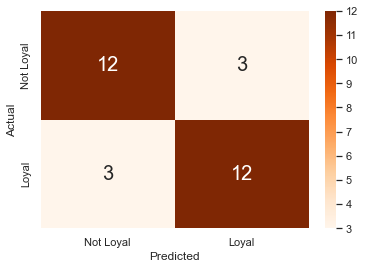

In [15]:
#Probability and Confusion Matrix
Posterior=Model.predict_proba(X)
Posterior=pd.DataFrame(Posterior)
print(Posterior.head())
pred_class=(Posterior[1]>0.5).astype(np.int) 
confusion=confusion_matrix(Y.astype(float),pred_class) 
sns.heatmap(confusion, annot=True,cmap="Oranges",annot_kws={"size":20},
           xticklabels=["Not Loyal","Loyal"],
           yticklabels=["Not Loyal","Loyal"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [16]:
#Getting Accuracy,Recall, and Precision
print("Accuracy=","{0:.4f}".format(accuracy_score(Y.astype(np.int),pred_class)))
print("Recall=","{0:.4f}".format(recall_score(Y.astype(np.int),pred_class)))
print("Precision=","{0:.4f}".format(precision_score(Y.astype(np.int),pred_class)))

Accuracy= 0.8000
Recall= 0.8000
Precision= 0.8000


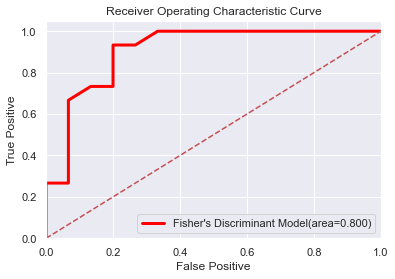

In [18]:
#Getting the ROC Curve
disroc=roc_auc_score(Y.astype(float),pred_class)
fpr,tpr,thresholds=roc_curve(Y.astype(float),Posterior[1])
plt.figure()
plt.plot(fpr,tpr,color="red",lw=3,label="Fisher's Discriminant Model(area=%0.3f)" %disroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()